# Kinematics of the Steward Platform
The Stewart platform is a six degrees-of-freedom manipulator, which is light weight, highly accurate, and capable of supporting heavy loads. Typical applications include manufacturing, surgery, medical rehabilitation and, most popularly, vehicular motion simulation, for instance, for flight simulators.

<img src="1-s2.0-S0967066117300643-gr1_lrg.jpg", width=400/>
<center> SIMONA Research Simulator at TU Delft

In [1]:
import warnings
from math import *
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import numpy as np
from IPython.display import HTML

from StewartPlatform import StewartPlatform

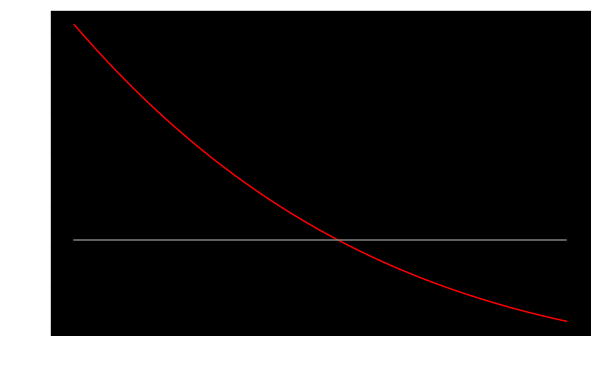

In [2]:
stewart_platform = StewartPlatform()

x_left = -1
x_right = -0.6

x = np.linspace(x_left, x_right, 200)
y = [stewart_platform(i) for i in x]

plt.figure(figsize=(9.7, 6))
plt.rc('text', usetex=True)
plt.style.use('dark_background')
plt.plot(x, y, 'r')
plt.plot([x_left, x_right], [0]*2, 'gray')
plt.xlabel(r'$\theta$')
plt.ylabel('f')
plt.show()

In [3]:
import scipy.optimize as spo
def root_finder(func, a, b):
    return spo.brentq(func, a, b)

In [4]:
def compare_solutions(expected, computed):
    assert np.isclose(expected, computed), \
        'Failed root computation:\n\tExpected value: {}\n\tActual value: {}'.format(expected, computed)
    print('Passed test: 𝜃 = {0:.3f} rad = {1:.1f}°'.format(computed, degrees(computed)))

    fig = plt.figure(figsize=(10, 10))
    stewart_platform.plot_pose(computed, fig)
    plt.show()

Passed test: 𝜃 = -0.785 rad = -45.0°


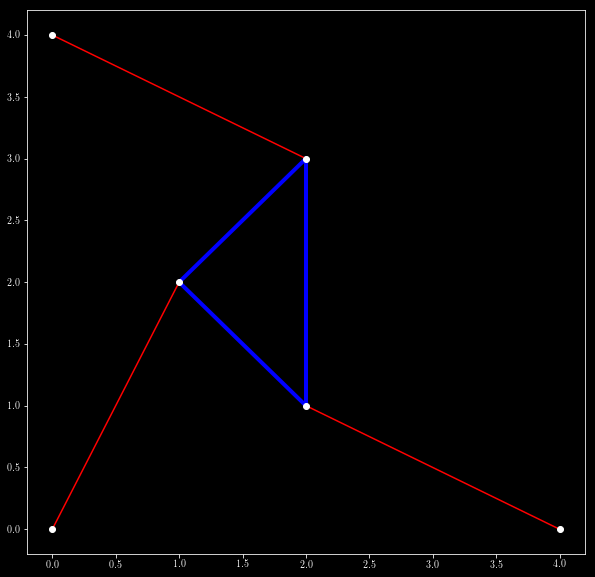

In [5]:
expected_theta = -pi/4
computed_theta = root_finder(stewart_platform, x_left, x_right)
compare_solutions(expected_theta, computed_theta)

Passed test: 𝜃 = 0.785 rad = 45.0°


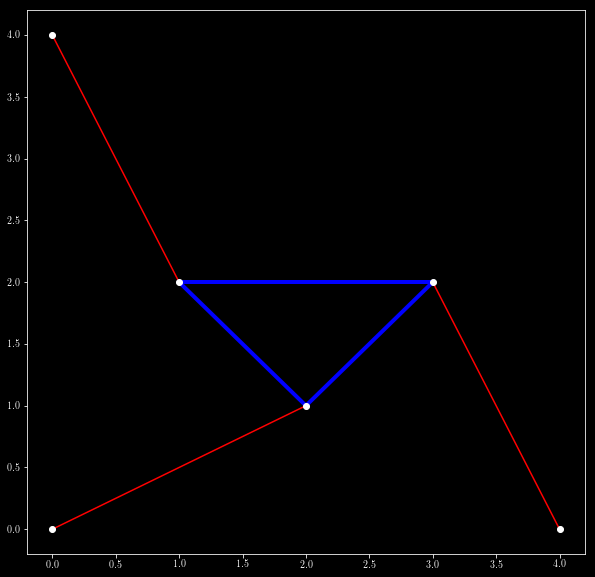

In [6]:
expected_theta = pi/4
computed_theta = root_finder(stewart_platform, -x_right, -x_left)
compare_solutions(expected_theta, computed_theta)

In [7]:
fig = plt.figure(figsize=(10, 10))

p0 = np.array([sqrt(5)]*3)
p1 = np.array([4, 3, 2.5])

def init():
    theta = root_finder(stewart_platform, -pi/2, 0)
    return stewart_platform.plot_pose(theta, fig)

def animate(i):
    fig.clf()
    stewart_platform.set_p(p0 + 0.15*sin(2*pi*i/50)*(p1 - p0))
    theta = root_finder(stewart_platform, -pi/2, 0)
    return stewart_platform.plot_pose(theta, fig)

ani = animation.FuncAnimation(fig, animate, np.arange(0, 50),
                              interval=50, blit=True, init_func=init)

# ignore warning for deprecated axes setting
warnings.simplefilter("ignore")
HTML(ani.to_html5_video())